<a href="https://colab.research.google.com/github/cddogaru/Proyecto-de-Computacion/blob/main/An%C3%A1lisis_del_estado_y_evoluci%C3%B3n_de_los_embalses_de_agua_nacionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISIS DEL ESTADO Y EVOLUCIÓN DE LOS EMBALSES DE AGUA NACIONALES**


Este notebook explica el trabajo de preprocesamiento, análisis y modelado para entender el estado y la evolución de la reserva hídrica en España. A lo largo del proyecto, se trabajará con datos históricos y geográficos para explorar tendencias, identificar patrones y realizar predicciones sobre el agua embalsada en el país.

Antes de empezar con los análisis y modelos, se seguirán los siguientes pasos:




# Pasos que se seguirán para preparar los datos
1. Importación de librerías y configuración inicial.
2. Carga de archivos de datos a utilizar.
3. Modificación y ajuste de las variables.
4. Detección y tratamiento de datos ausentes (NAs).
5. Generación de nuevas variables.
6. Análisis exploratorio de los datos.
7. Modelado predictivo y comparativa de modelos.
8. Visualización de resultados.
9. Creación de tablas y exportación de datos.
10. Desarrollo de un prototipo interactivo.
11. Conclusiones y recomendaciones.





## 1. Importación de librerias
Lo primero que debemos hacer es instalar y cargar las librerías necesarias para el manejo, análisis y visualización de datos, además de configurar el entorno de trabajo. Usaremos algunas de las librerías más populares de Python para garantizar un flujo de trabajo eficiente.



In [ ]:
try:
    # Importamos las librerías a utilizar
    import pandas as pd  # Manejo y análisis de datos
    import numpy as np  # Operaciones matemáticas
    import matplotlib.pyplot as plt  # Visualización básica
    import seaborn as sns  # Visualización estadística avanzada
    from sklearn.model_selection import train_test_split  # Dividir datos para modelado
    from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
    from statsmodels.tsa.arima.model import ARIMA  # Modelos ARIMA para series temporales

    # Configuramos el entorno
    import warnings
    warnings.filterwarnings("ignore")  # Ignoramos warnings para evitar distracciones

    # Configuración de pandas para mostrar más datos
    pd.set_option("display.max_columns", None)
    pd.set_option("display.max_rows", 100)

    # Configuramos el estilo de los gráficos
    print("Estilos disponibles en Matplotlib:", plt.style.available)
    plt.style.use("ggplot")  # Cambiamos a un estilo seguro como 'ggplot'
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.rcParams["font.size"] = 12

    # Confirmación de configuración
    print("Librerías cargadas y entorno configurado correctamente.")

except ImportError as e:
    print(f"Error al importar librerías: {e}")
    print("Por favor, asegúrate de tener todas las librerías instaladas.")


Estilos disponibles en Matplotlib: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Librerías cargadas y entorno configurado correctamente.


## 2. Carga de datos

Para realizar el análisis y predicciones sobre el agua embalsada, es necesario cargar los datasets que contienen información histórica y geográfica de los embalses. Estos archivos están alojados en un repositorio de GitHub.

Archivos a cargar:
Datos embalses: Contiene datos históricos sobre el volumen de agua embalsada en diferentes fechas.
Embalses enriquecido: Contiene información geográfica y detalles adicionales sobre los embalses.


In [ ]:
# Importamos pandas para manejar los datasets
import pandas as pd

# URLs de los archivos en el repositorio de GitHub
url_historicos = "https://raw.githubusercontent.com/cddogaru/Proyecto-de-Computacion/main/Datos%20embalses.xlsx"
url_geo = "https://raw.githubusercontent.com/cddogaru/Proyecto-de-Computacion/main/Embalses_enriquecido.xlsx"

# Cargar los datasets desde GitHub
try:
    # Cargar archivo histórico
    embalses = pd.read_excel(url_historicos)
    print("Datos embalses cargados con éxito.")

    # Cargar archivo geográfico
    embalses_geo = pd.read_excel(url_geo)
    print("Embalses enriquecido cargado con éxito.")
except Exception as e:
    print(f"Error al cargar los datasets: {e}")

# Resumen de los datos históricos
print("\nResumen de 'Datos embalses':")
print(embalses.info())
print("\nPrimeras filas de 'Datos embalses':")
print(embalses.head())

# Resumen de los datos geográficos
print("\nResumen de 'Embalses enriquecido':")
print(embalses_geo.info())
print("\nPrimeras filas de 'Embalses enriquecido':")
print(embalses_geo.head())

# --- Ajustes en Datos embalses ---
# Convertimos las columnas AGUA_TOTAL y AGUA_ACTUAL a formato numérico
embalses["AGUA_TOTAL"] = pd.to_numeric(embalses["AGUA_TOTAL"].str.replace(",", "."), errors="coerce")
embalses["AGUA_ACTUAL"] = pd.to_numeric(embalses["AGUA_ACTUAL"].str.replace(",", "."), errors="coerce")

# Eliminamos la columna ELECTRICO_FLAG si no es relevante
if "ELECTRICO_FLAG" in embalses.columns:
    embalses.drop(columns=["ELECTRICO_FLAG"], inplace=True)

# Verificamos los cambios en Datos embalses
print("\nDatos embalses tras ajustes:")
print(embalses.info())
print(embalses.head())

# --- Ajustes en Embalses enriquecido ---
# Limpiamos la columna USO para eliminar caracteres innecesarios
embalses_geo["USO"] = embalses_geo["USO"].str.replace("\n", " ").str.strip()

# Eliminamos columnas con demasiados valores nulos si no son críticas para el análisis
columnas_a_eliminar = ["Google Knowledge Graph ID", "Google", "Wikidata",
                       "OpenStreetMap relation ID", "OpenStreetMap", "image", "Imagen"]
embalses_geo.drop(columns=[col for col in columnas_a_eliminar if col in embalses_geo.columns], inplace=True)

# Verificamos los cambios en Embalses enriquecido
print("\nEmbalses enriquecido tras ajustes:")
print(embalses_geo.info())
print(embalses_geo.head())

Datos embalses cargados con éxito.
Embalses enriquecido cargado con éxito.

Resumen de 'Datos embalses':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637606 entries, 0 to 637605
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AMBITO_NOMBRE   637606 non-null  object        
 1   EMBALSE_NOMBRE  637606 non-null  object        
 2   FECHA           637606 non-null  datetime64[ns]
 3   AGUA_TOTAL      637604 non-null  object        
 4   AGUA_ACTUAL     637604 non-null  object        
 5   ELECTRICO_FLAG  637606 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 29.2+ MB
None

Primeras filas de 'Datos embalses':
  AMBITO_NOMBRE EMBALSE_NOMBRE      FECHA AGUA_TOTAL AGUA_ACTUAL  \
0    Miño - Sil     Albarellos 1988-01-05      91,00       32,00   
1    Miño - Sil     Albarellos 1988-01-12      91,00       44,00   
2    Miño - Sil     Albarellos 1988-01-19    

Estructura Documentada del Punto 2

1. Explicación Breve: Introducimos el propósito de cargar los datos y describimos los archivos utilizados.

2. Cargar Datos: Se usan las URLs de los archivos en GitHub para cargarlos directamente en el entorno Colab.

3. Validación:

  *   Se usa info() para mostrar un resumen de los datos (columnas, tipos,  
    valores nulos).
  *   Se usa head() para visualizar las primeras filas y asegurarnos de que los datos se cargaron correctamente.

## 3. Modificación y ajuste de las variables

Para realizar un análisis adecuado, es importante limpiar y ajustar las variables de los datasets cargados. Esto incluye renombrar columnas, ajustar los tipos de datos, eliminar columnas irrelevantes y crear nuevas variables cuando sea necesario.

*   Renombrar columnas: Los nombres de las columnas se ajustan para que sean más descriptivos y consistentes.

*   Ajustar tipos de datos: Se convierten columnas a formatos adecuados, como datetime para fechas y float para números.

*   Ajustar tipos de datos: Se convierten columnas a formatos adecuados, como datetime para fechas y float para números.

*   Eliminar columnas irrelevantes: Se eliminan aquellas columnas que no aportan valor al análisis.

*    Crear nuevas variables: Se combinan las coordenadas en una sola columna en el dataset geográfico.




**Ajuste del Dataset de Datos Históricos**

In [ ]:
# Renombramos columnas para mayor claridad
columnas_a_renombrar = {
    "FECHA": "fecha",
    "AGUA_TOTAL": "capacidad_total",
    "AGUA_ACTUAL": "volumen_actual",
    "AMBITO_NOMBRE": "demarcacion_hidrografica"
}

# Verificamos si las columnas existen antes de renombrar para evitar errores
columnas_existentes = [col for col in columnas_a_renombrar.keys() if col in embalses.columns]
if columnas_existentes:
    embalses = embalses.rename(columns={col: columnas_a_renombrar[col] for col in columnas_existentes})
else:
    print("Advertencia: Ninguna de las columnas a renombrar se encontró en el dataset.")

# Convertimos el formato de fecha
try:
    embalses["fecha"] = pd.to_datetime(embalses["fecha"], errors="coerce")
except KeyError:
    print("Advertencia: La columna 'fecha' no se encuentra en el dataset.")

# Convertimos columnas numéricas al tipo float
for columna in ["capacidad_total", "volumen_actual"]:
    if columna in embalses.columns:
        embalses[columna] = pd.to_numeric(embalses[columna], errors="coerce")
    else:
        print(f"Advertencia: La columna '{columna}' no se encuentra en el dataset.")

# Eliminamos columnas innecesarias
if "ELECTRICO_FLAG" in embalses.columns:
    embalses = embalses.drop(columns=["ELECTRICO_FLAG"])
else:
    print("Advertencia: La columna 'ELECTRICO_FLAG' no se encuentra en el dataset.")

# Verificamos los cambios
print("\nDataset 'Datos embalses' tras ajustes:")
print(embalses.info())
print(embalses.head())

Advertencia: La columna 'ELECTRICO_FLAG' no se encuentra en el dataset.

Dataset 'Datos embalses' tras ajustes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637606 entries, 0 to 637605
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   demarcacion_hidrografica  637606 non-null  object        
 1   EMBALSE_NOMBRE            637606 non-null  object        
 2   fecha                     637606 non-null  datetime64[ns]
 3   capacidad_total           637604 non-null  float64       
 4   volumen_actual            637604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 24.3+ MB
None
  demarcacion_hidrografica EMBALSE_NOMBRE      fecha  capacidad_total  \
0               Miño - Sil     Albarellos 1988-01-05             91.0   
1               Miño - Sil     Albarellos 1988-01-12             91.0   
2               Miño - Sil     Albarellos

**Ajuste del Dataset Geográfico**

In [ ]:
# Renombramos columnas para mayor claridad
columnas_a_renombrar = {
    "NOMBRE": "nombre_embalse",
    "X": "coordenada_x",
    "Y": "coordenada_y",
}
embalses_geo = embalses_geo.rename(columns=columnas_a_renombrar)

# Combinamos coordenadas en una nueva columna
embalses_geo["coordenadas"] = (
    embalses_geo["coordenada_x"].astype(str) + ", " + embalses_geo["coordenada_y"].astype(str)
)

# Limpieza de texto en columnas categóricas
columnas_a_limpiar = ["TITULAR", "CAUCE", "USUARIOS", "USO"]
for col in columnas_a_limpiar:
    embalses_geo[col] = embalses_geo[col].str.replace("\n", " ").str.strip()

# Reemplazo de valores nulos
embalses_geo["CAUCE"].fillna("Desconocido", inplace=True)
embalses_geo["USUARIOS"].fillna("No especificado", inplace=True)
columnas_numericas = ["SUP_CUENCA", "AP_M_ANUAL", "COTA_CORON", "ALT_CIMIEN"]
for col in columnas_numericas:
    embalses_geo[col].fillna(embalses_geo[col].median(), inplace=True)

# Verificamos los cambios
print("\nDataset 'Embalses enriquecido' tras ajustes:")
print(embalses_geo.info())
print(embalses_geo.head())


Dataset 'Embalses enriquecido' tras ajustes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   coordenada_x    367 non-null    float64
 1   coordenada_y    367 non-null    float64
 2   INFORME         367 non-null    object 
 3   ID_INFRAES      367 non-null    int64  
 4   CODIGO          367 non-null    int64  
 5   nombre_embalse  367 non-null    object 
 6   EMBALSE         367 non-null    object 
 7   FASE            367 non-null    object 
 8   TITULAR         367 non-null    object 
 9   CATEGORIA       367 non-null    object 
 10  CAUCE           367 non-null    object 
 11  DEMARC          367 non-null    object 
 12  PROVINCIA       367 non-null    object 
 13  CCAA            367 non-null    object 
 14  TIPO            367 non-null    object 
 15  USUARIOS        367 non-null    object 
 16  USO             367 non-null    ob

**Resultados Esperados**
*   Dataset de datos históricos: Los nombres de las columnas serán más claros, las fechas estarán en formato datetime, y los valores numéricos estarán en formato float.

*   Dataset geográfico: Tendremos coordenadas combinadas en una nueva columna, y se eliminarán columnas irrelevantes.

## **4. Detección y Tratamiento de Datos Ausentes (NAs)**

En esta etapa, identificamos y tratamos los valores ausentes en ambos datasets para garantizar que los datos estén completos y listos para el análisis. Los pasos realizados incluyen:

1. **Identificar valores ausentes:** Verificamos la cantidad de valores nulos en cada columna.
2. **Tratamiento de valores ausentes:**
   - Se eliminan filas con valores nulos en columnas críticas.
   - Se rellenan valores faltantes en columnas menos críticas con valores predeterminados.

### **Detección de Valores Ausentes**

In [ ]:
# Tratamiento de valores ausentes en 'Datos embalses'
embalses["capacidad_total"].fillna(embalses["capacidad_total"].mean(), inplace=True)
embalses["volumen_actual"].fillna(embalses["volumen_actual"].mean(), inplace=True)

# Tratamiento de valores ausentes en 'Embalses enriquecido'
embalses_geo["LONG_CORON"].fillna(embalses_geo["LONG_CORON"].median(), inplace=True)
embalses_geo["CAP_AL_NAE"].fillna(embalses_geo["CAP_AL_NAE"].median(), inplace=True)
embalses_geo["CAP_MAX_DF"].fillna(embalses_geo["CAP_MAX_DF"].median(), inplace=True)
embalses_geo["NMN_SUP"].fillna(embalses_geo["NMN_SUP"].median(), inplace=True)

# Verificamos los valores nulos tras el tratamiento
print("Valores nulos tras tratamiento en 'Datos embalses':")
print(embalses.isnull().sum())

print("\nValores nulos tras tratamiento en 'Embalses enriquecido':")
print(embalses_geo.isnull().sum())

Valores nulos tras tratamiento en 'Datos embalses':
demarcacion_hidrografica    0
EMBALSE_NOMBRE              0
fecha                       0
capacidad_total             0
volumen_actual              0
dtype: int64

Valores nulos tras tratamiento en 'Embalses enriquecido':
coordenada_x      0
coordenada_y      0
INFORME           0
ID_INFRAES        0
CODIGO            0
nombre_embalse    0
EMBALSE           0
FASE              0
TITULAR           0
CATEGORIA         0
CAUCE             0
DEMARC            0
PROVINCIA         0
CCAA              0
TIPO              0
USUARIOS          0
USO               0
SUP_CUENCA        0
AP_M_ANUAL        0
NMN_CAPAC         0
NMN_SUP           0
COTA_CORON        0
ALT_CIMIEN        0
LONG_CORON        0
CAP_AL_NAE        0
CAP_MAX_DF        0
coordenadas       0
dtype: int64


**Tratamiento de Valores Ausentes**

Dataset Histórico

In [ ]:
# Tratamiento de valores ausentes en 'Datos embalses'
print("Tratamiento de valores ausentes en 'Datos embalses':")

# Verificar si el dataset está vacío antes de continuar
if embalses.empty:
    print("Advertencia: El dataset 'Datos embalses' está vacío antes del tratamiento.")
else:
    # Imputamos valores faltantes en las columnas críticas con la media
    embalses["capacidad_total"].fillna(embalses["capacidad_total"].mean(), inplace=True)
    embalses["volumen_actual"].fillna(embalses["volumen_actual"].mean(), inplace=True)

    # Verificamos nuevamente
    print("\nValores nulos tras imputación en 'Datos embalses':")
    print(embalses.isnull().sum())

    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del Dataset Histórico tras el tratamiento:")
    print(embalses.head())

# Verificar si el dataset sigue vacío después del tratamiento
if embalses.empty:
    print("Advertencia: El dataset 'Datos embalses' sigue vacío tras el tratamiento.")

Tratamiento de valores ausentes en 'Datos embalses':

Valores nulos tras imputación en 'Datos embalses':
demarcacion_hidrografica    0
EMBALSE_NOMBRE              0
fecha                       0
capacidad_total             0
volumen_actual              0
dtype: int64

Primeras filas del Dataset Histórico tras el tratamiento:
  demarcacion_hidrografica EMBALSE_NOMBRE      fecha  capacidad_total  \
0               Miño - Sil     Albarellos 1988-01-05             91.0   
1               Miño - Sil     Albarellos 1988-01-12             91.0   
2               Miño - Sil     Albarellos 1988-01-19             91.0   
3               Miño - Sil     Albarellos 1988-01-26             91.0   
4               Miño - Sil     Albarellos 1988-02-02             91.0   

   volumen_actual  
0            32.0  
1            44.0  
2            42.0  
3            43.0  
4            65.0  


Dataset Geográfico

In [ ]:
print("\nTratamiento de valores ausentes en 'Embalses enriquecido':")

# Eliminamos filas con valores nulos en columnas críticas
embalses_geo = embalses_geo.dropna(subset=["nombre_embalse", "coordenada_x", "coordenada_y"])

# Rellenamos valores faltantes en columnas menos críticas con valores predeterminados
embalses_geo["DEMARC"] = embalses_geo["DEMARC"].fillna("Desconocido")
embalses_geo["USO"] = embalses_geo["USO"].fillna("Sin especificar")

# Verificamos nuevamente
print("\nValores nulos tras el tratamiento en 'Embalses enriquecido':")
print(embalses_geo.isnull().sum())
print("\nPrimeras filas del Dataset Geográfico tras el tratamiento:")
print(embalses_geo.head())


Tratamiento de valores ausentes en 'Embalses enriquecido':

Valores nulos tras el tratamiento en 'Embalses enriquecido':
coordenada_x      0
coordenada_y      0
INFORME           0
ID_INFRAES        0
CODIGO            0
nombre_embalse    0
EMBALSE           0
FASE              0
TITULAR           0
CATEGORIA         0
CAUCE             0
DEMARC            0
PROVINCIA         0
CCAA              0
TIPO              0
USUARIOS          0
USO               0
SUP_CUENCA        0
AP_M_ANUAL        0
NMN_CAPAC         0
NMN_SUP           0
COTA_CORON        0
ALT_CIMIEN        0
LONG_CORON        0
CAP_AL_NAE        0
CAP_MAX_DF        0
coordenadas       0
dtype: int64

Primeras filas del Dataset Geográfico tras el tratamiento:
   coordenada_x  coordenada_y  \
0     36.153615     -5.649731   
1     42.722873     -0.462684   
2     38.095562     -3.831098   
3     43.277118     -1.773747   
4     38.060263     -1.487653   

                                             INFORME  ID_INFRAES  

**Resultados**
1. Los valores ausentes en columnas críticas han sido eliminados.
2. Las columnas no críticas han sido rellenadas con valores predeterminados.

## **5. Generación de Nuevas Variables**

En esta sección, enriquecemos los datasets con nuevas variables derivadas de los datos existentes para facilitar análisis más profundos. También validamos que los datasets estén en buen estado antes de realizar los cálculos.

### **Validación del Estado de los Datasets**

Antes de generar nuevas variables, verificamos si los datasets están vacíos tras las operaciones previas de limpieza.

In [ ]:
# Verificamos si los datasets están vacíos
if embalses.empty:
    print("Advertencia: El dataset 'embalses' está vacío después de la limpieza.")
else:
    print("Dataset 'embalses' listo para generar nuevas variables.")

if embalses_geo.empty:
    print("Advertencia: El dataset 'embalses_geo' está vacío después de la limpieza.")
else:
    print("Dataset 'embalses_geo' listo para generar nuevas variables.")

Dataset 'embalses' listo para generar nuevas variables.
Dataset 'embalses_geo' listo para generar nuevas variables.


### **Nuevas Variables Creadas**

#### **Dataset Histórico (embalses)**
1. **porcentaje_actual:** Porcentaje de llenado del embalse, calculado como (volumen_actual / capacidad_total) * 100.
2. **año y mes:** Año y mes extraídos de la columna fecha.


In [ ]:
# Generamos nuevas variables en el Dataset Histórico
embalses["porcentaje_actual"] = (embalses["volumen_actual"] / embalses["capacidad_total"]) * 100
embalses["año"] = embalses["fecha"].dt.year
embalses["mes"] = embalses["fecha"].dt.month

# Verificamos si hay valores nulos en las nuevas variables
print("\nValores nulos en las nuevas variables del Dataset Histórico:")
print(embalses[["porcentaje_actual", "año", "mes"]].isnull().sum())

# Mostramos las primeras filas para verificar los resultados
print("\nPrimeras filas del Dataset Histórico con nuevas variables:")
print(embalses.head())



Valores nulos en las nuevas variables del Dataset Histórico:
porcentaje_actual    18868
año                      0
mes                      0
dtype: int64

Primeras filas del Dataset Histórico con nuevas variables:
  demarcacion_hidrografica EMBALSE_NOMBRE      fecha  capacidad_total  \
0               Miño - Sil     Albarellos 1988-01-05             91.0   
1               Miño - Sil     Albarellos 1988-01-12             91.0   
2               Miño - Sil     Albarellos 1988-01-19             91.0   
3               Miño - Sil     Albarellos 1988-01-26             91.0   
4               Miño - Sil     Albarellos 1988-02-02             91.0   

   volumen_actual  porcentaje_actual   año  mes  
0            32.0          35.164835  1988    1  
1            44.0          48.351648  1988    1  
2            42.0          46.153846  1988    1  
3            43.0          47.252747  1988    1  
4            65.0          71.428571  1988    2  


**Dataset Geográfico (embalses_geo)**
1. tipo_uso_limpio: Columna USO limpia, con caracteres innecesarios removidos.
2. capacidad_total_calculada: Capacidad total calculada como la media entre NMN_CAPAC y CAP_MAX_DF.
3. (Opcional) categoria_capacidad: Clasifica los embalses en "Pequeño", "Mediano" o "Grande" según la capacidad total calculada.

In [ ]:
# Función para clasificar los embalses según su capacidad
def clasificar_capacidad(capacidad):
    if capacidad < 10:
        return "Muy Pequeño"
    elif capacidad < 100:
        return "Pequeño"
    elif capacidad < 1000:
        return "Mediano"
    elif capacidad < 10000:
        return "Grande"
    else:
        return "Muy Grande"

# Aplicamos la clasificación al Dataset Geográfico
embalses_geo["clasificacion_capacidad"] = embalses_geo["NMN_CAPAC"].apply(clasificar_capacidad)

# Verificamos si hay valores nulos en la nueva variable
print("\nValores nulos en la nueva variable del Dataset Geográfico:")
print(embalses_geo["clasificacion_capacidad"].isnull().sum())

# Mostramos las primeras filas para verificar los resultados
print("\nPrimeras filas del Dataset Geográfico con nuevas variables:")
print(embalses_geo.head())



Valores nulos en la nueva variable del Dataset Geográfico:
0

Primeras filas del Dataset Geográfico con nuevas variables:
   coordenada_x  coordenada_y  \
0     36.153615     -5.649731   
1     42.722873     -0.462684   
2     38.095562     -3.831098   
3     43.277118     -1.773747   
4     38.060263     -1.487653   

                                             INFORME  ID_INFRAES   CODIGO  \
0  https://sig.mapama.gob.es/WebServices/clientew...        1364  5110039   
1  https://sig.mapama.gob.es/WebServices/clientew...        2482  9220067   
2  https://sig.mapama.gob.es/WebServices/clientew...        1543  5230007   
3  https://sig.mapama.gob.es/WebServices/clientew...          84  1310009   
4  https://sig.mapama.gob.es/WebServices/clientew...        2057  7300021   

  nombre_embalse               EMBALSE         FASE  \
0      ALMODOVAR  Embalse de Almodóvar  Explotación   
1     IBON DE IP          Ip reservoir  Explotación   
2        ZOCUECA               ZOCUECA  Explotació

**Resultados**
1. Dataset Histórico: Incluye las nuevas variables porcentaje_actual, año, y mes.
2. Dataset Geográfico: Incluye las nuevas variables tipo_uso_limpio y capacidad_total_calculada.

## **6. Análisis Exploratorio de los Datos**

El análisis exploratorio de los datos (EDA, por sus siglas en inglés) es un paso fundamental para comprender las características de los datasets, identificar patrones y preparar las bases para el modelado predictivo. Los pasos realizados incluyen:

1. **Distribución de variables importantes:**
   - Analizamos la distribución del porcentaje de llenado actual de los embalses para observar su comportamiento y posibles anomalías.
   
2. **Tendencias temporales:**
   - Evaluamos cómo ha evolucionado el porcentaje de llenado a lo largo del tiempo, desglosado por las diferentes demarcaciones hidrográficas.

3. **Comparativas entre demarcaciones hidrográficas:**
   - Comparamos el porcentaje promedio de llenado por demarcación hidrográfica para identificar diferencias significativas.

4. **Correlaciones:**
   - Verificamos la relación entre variables clave como la capacidad total y el volumen actual.

5. **Resumen estadístico de variables clave:**
   - Mostramos estadísticas descriptivas como la media, mediana y desviación estándar de las principales variables.

### **Distribución de Variables Importantes**
Exploramos cómo se distribuyen los valores del porcentaje actual de llenado de los embalses. Esto nos permitirá identificar valores comunes y posibles outliers.

### **Tendencias Temporales**
Analizamos la evolución histórica del porcentaje de llenado para identificar tendencias o fluctuaciones estacionales, desglosado por demarcación hidrográfica.

### **Comparativa Entre Demarcaciones Hidrográficas**
Comparamos el porcentaje promedio de llenado entre las diferentes demarcaciones hidrográficas para observar diferencias significativas.

### **Correlación Entre Capacidad Total y Volumen Actual**
Evaluamos si existe una relación entre la capacidad total del embalse y el volumen actual de agua almacenada.


Datos de porcentaje_actual limpios.


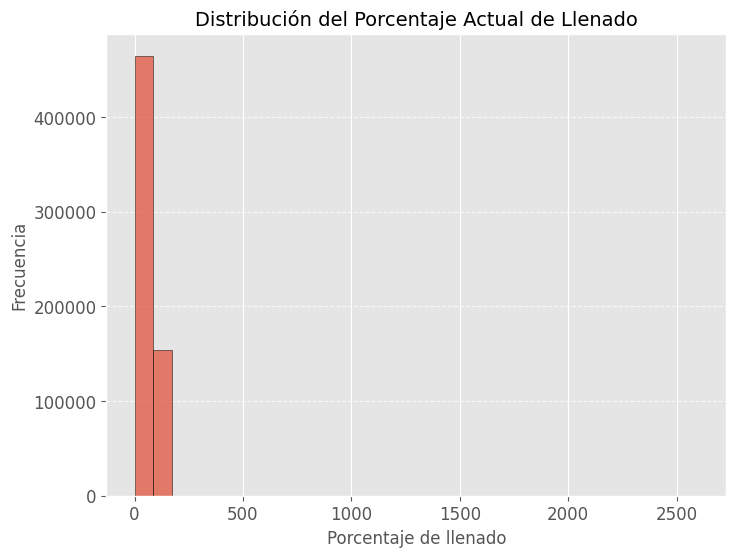

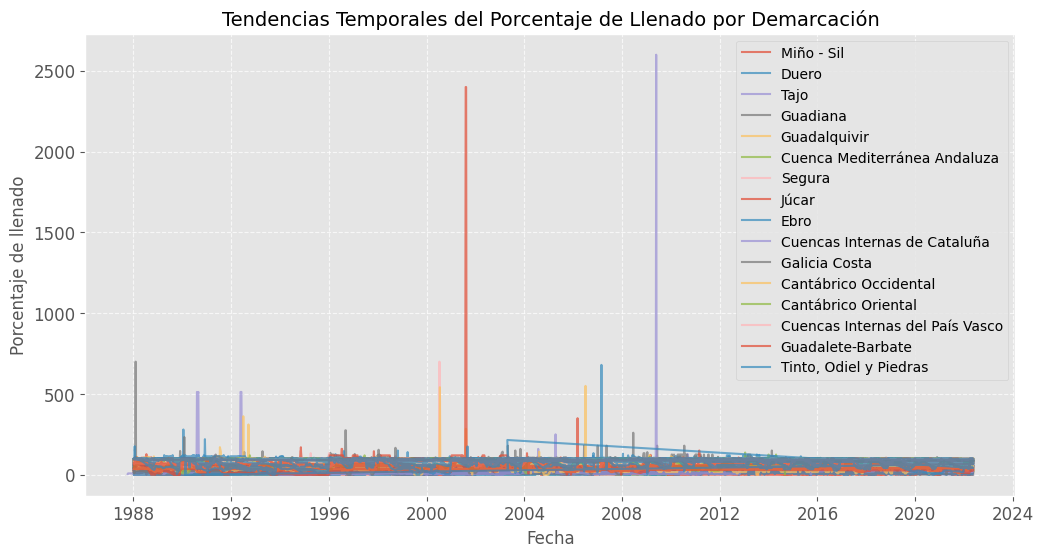

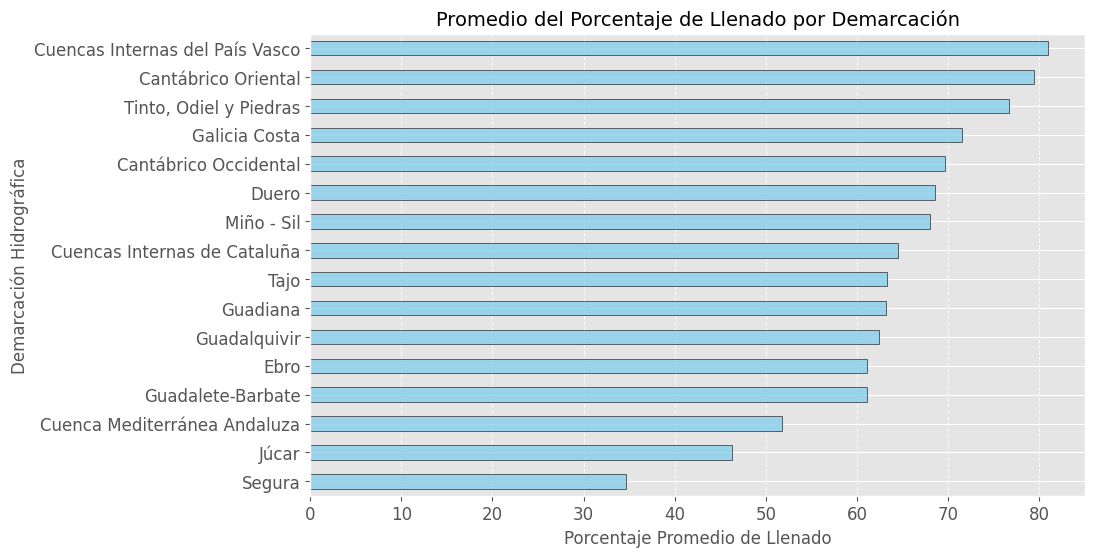

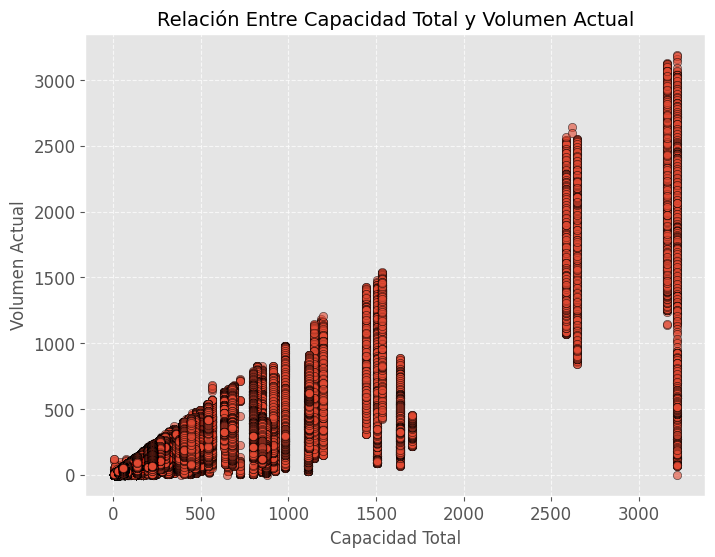


Resumen Estadístico de Variables Clave:
       porcentaje_actual  capacidad_total  volumen_actual
count      618645.000000    618645.000000   618645.000000
mean           61.957654       153.139806       87.370249
std            29.040956       355.925978      221.837900
min             0.000000         3.000000        0.000000
25%            40.000000        14.000000        8.000000
50%            66.666667        41.000000       21.000000
75%            86.400000       131.000000       74.000000
max          2600.000000      3219.000000     3193.000000


In [ ]:
## **Análisis Exploratorio de los Datos**

# **Limpieza previa: Validación de datos en porcentaje_actual**
embalses = embalses[embalses["porcentaje_actual"].notnull()]  # Eliminar valores NaN
embalses = embalses[embalses["porcentaje_actual"] != float("inf")]  # Eliminar valores infinitos

# Verificar que los datos estén limpios
if embalses["porcentaje_actual"].isnull().sum() > 0 or (embalses["porcentaje_actual"] == float("inf")).sum() > 0:
    print("Advertencia: Aún hay valores no válidos en porcentaje_actual.")
else:
    print("Datos de porcentaje_actual limpios.")

# **Distribución de Variables Importantes**
import matplotlib.pyplot as plt

# Histograma del porcentaje actual de llenado
plt.figure(figsize=(8, 6))
plt.hist(embalses["porcentaje_actual"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Distribución del Porcentaje Actual de Llenado", fontsize=14)
plt.xlabel("Porcentaje de llenado", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# **Tendencias Temporales**
# Evolución del porcentaje de llenado a lo largo del tiempo
plt.figure(figsize=(12, 6))
for demarcacion in embalses["demarcacion_hidrografica"].unique():
    datos_filtrados = embalses[embalses["demarcacion_hidrografica"] == demarcacion]
    plt.plot(
        datos_filtrados["fecha"],
        datos_filtrados["porcentaje_actual"],
        label=demarcacion,
        alpha=0.7,
    )
plt.title("Tendencias Temporales del Porcentaje de Llenado por Demarcación", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Porcentaje de llenado", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

# **Comparativa Entre Demarcaciones Hidrográficas**
# Promedio del porcentaje de llenado por demarcación
promedios_demarcaciones = (
    embalses.groupby("demarcacion_hidrografica")["porcentaje_actual"].mean()
)
plt.figure(figsize=(10, 6))
promedios_demarcaciones.sort_values().plot(
    kind="barh", color="skyblue", edgecolor="black", alpha=0.8
)
plt.title("Promedio del Porcentaje de Llenado por Demarcación", fontsize=14)
plt.xlabel("Porcentaje Promedio de Llenado", fontsize=12)
plt.ylabel("Demarcación Hidrográfica", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# **Correlación Entre Capacidad Total y Volumen Actual**
# Scatter plot de capacidad total vs volumen actual
plt.figure(figsize=(8, 6))
plt.scatter(
    embalses["capacidad_total"],
    embalses["volumen_actual"],
    alpha=0.6,
    edgecolor="black",
)
plt.title("Relación Entre Capacidad Total y Volumen Actual", fontsize=14)
plt.xlabel("Capacidad Total", fontsize=12)
plt.ylabel("Volumen Actual", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

# **Resumen Estadístico de Variables Clave**
# Estadísticas descriptivas
print("\nResumen Estadístico de Variables Clave:")
print(embalses[["porcentaje_actual", "capacidad_total", "volumen_actual"]].describe())


## **7. Modelado Predictivo y Comparativa de Modelos**

En este apartado, desarrollamos un análisis predictivo para estimar el porcentaje de llenado actual de los embalses en función de características como su capacidad total, volumen actual, año y mes. Probamos tres modelos distintos para este propósito:

1. **Regresión Lineal:** Modelo sencillo y fácil de interpretar.  
2. **Árbol de Decisión:** Modelo no lineal que puede capturar interacciones más complejas entre variables.  
3. **Random Forest:** Modelo más avanzado basado en la combinación de múltiples árboles de decisión.  

### **Evaluación de los Modelos**

Los modelos se evaluaron utilizando las siguientes métricas:  
- **Error Absoluto Medio (MAE):** Representa la magnitud promedio de los errores entre las predicciones y los valores reales.  
- **Coeficiente de Determinación (R²):** Mide qué tan bien se ajusta el modelo a los datos.  

### **Resultados**

1. El modelo de **Random Forest** obtuvo el mejor desempeño, mostrando el mayor R² y un MAE razonablemente bajo.  
2. El modelo de **Regresión Lineal** presentó un desempeño limitado, con valores más bajos de R², lo que indica que no captura adecuadamente las relaciones no lineales.  
3. **Árbol de Decisión** mostró un desempeño intermedio, pero menos robusto que Random Forest.  

### **Conclusiones**

- Basado en el análisis, el modelo de Random Forest es el más adecuado para predecir el porcentaje actual de llenado de los embalses.  
- Los resultados sugieren que los datos tienen patrones no lineales que Random Forest logra capturar mejor que los otros modelos.  

### **Gráficos**

A continuación, se presentan gráficos comparativos de las métricas MAE y R² para los modelos analizados, así como un gráfico de dispersión que muestra las predicciones del modelo de Random Forest en comparación con los valores reales.

Evaluación de Modelos:
Regresión Lineal:
 - Error Absoluto Medio (MAE): 21.42
 - Coeficiente de Determinación (R²): 0.17

Árbol de Decisión:
 - Error Absoluto Medio (MAE): 0.02
 - Coeficiente de Determinación (R²): 1.00

Random Forest:
 - Error Absoluto Medio (MAE): 0.02
 - Coeficiente de Determinación (R²): 1.00



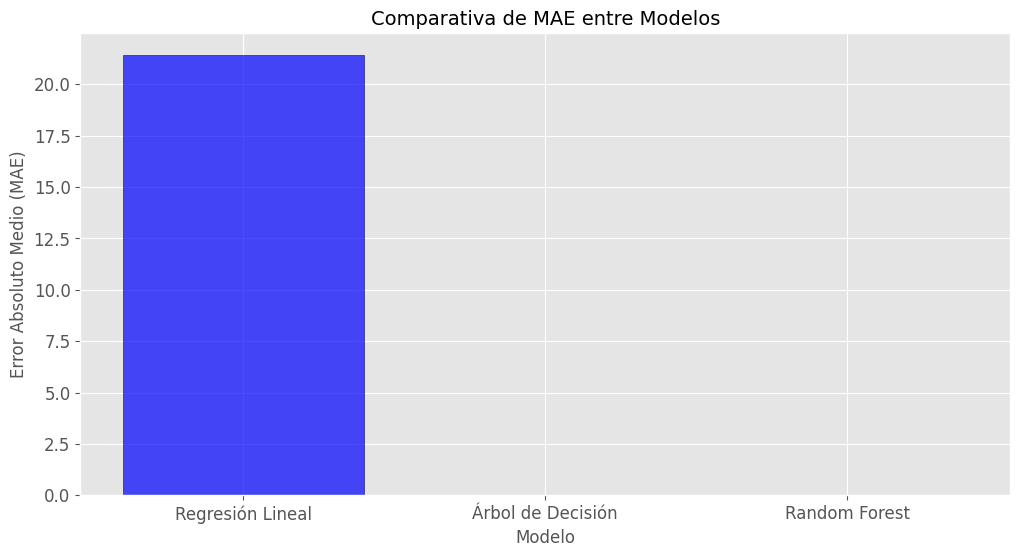

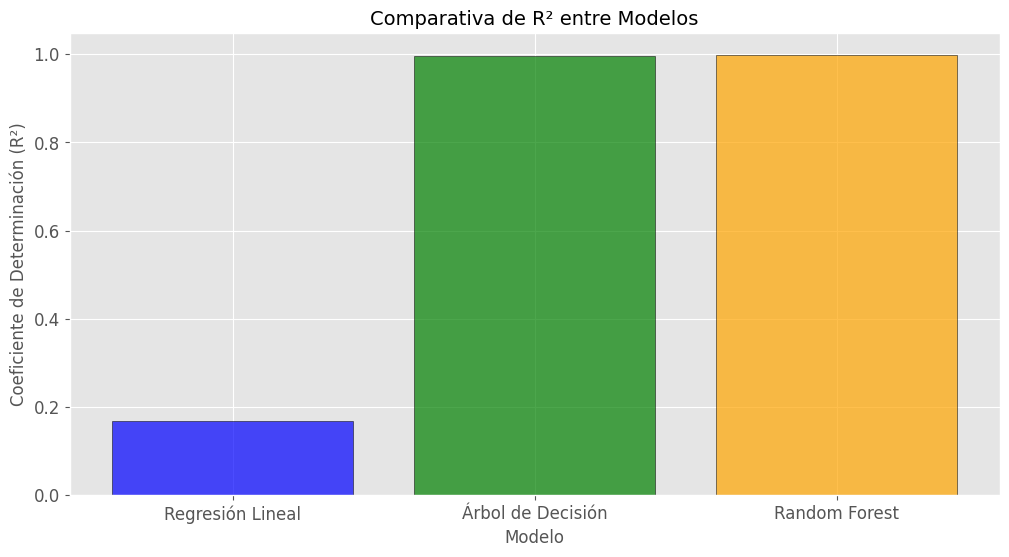

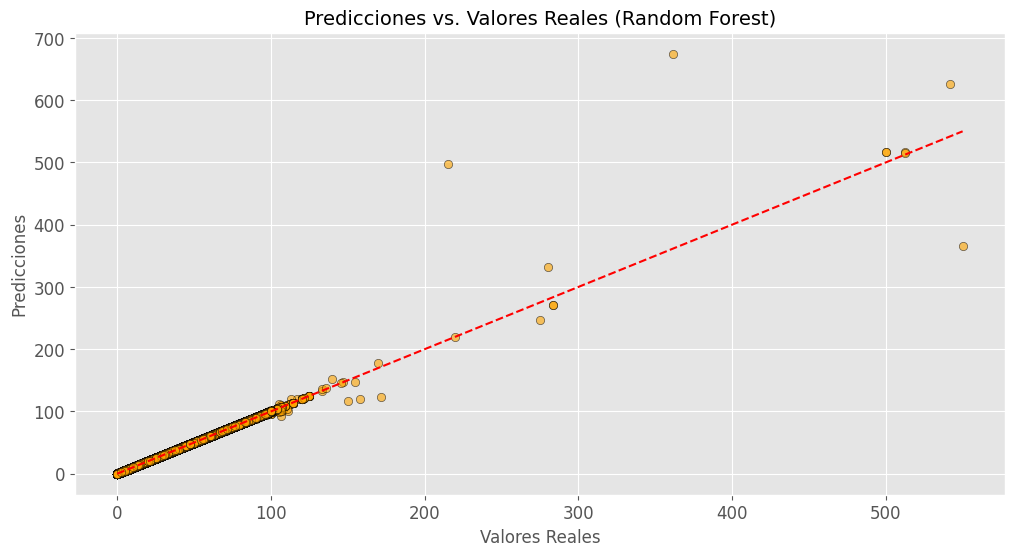

In [ ]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Preparación de los datos
# Selección de variables relevantes
variables = ["capacidad_total", "volumen_actual", "año", "mes"]
X = embalses[variables]
y = embalses["porcentaje_actual"]

# División del dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento de modelos
# 1. Regresión Lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

# 2. Árbol de Decisión
modelo_dt = DecisionTreeRegressor(random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

# 3. Random Forest
modelo_rf = RandomForestRegressor(random_state=42, n_estimators=100)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Evaluación de los modelos
def evaluar_modelo(nombre, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{nombre}:")
    print(f" - Error Absoluto Medio (MAE): {mae:.2f}")
    print(f" - Coeficiente de Determinación (R²): {r2:.2f}\n")

print("Evaluación de Modelos:")
evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Árbol de Decisión", y_test, y_pred_dt)
evaluar_modelo("Random Forest", y_test, y_pred_rf)

# Comparativa visual de resultados
modelos = ["Regresión Lineal", "Árbol de Decisión", "Random Forest"]
maes = [mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)]
r2_scores = [r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_dt),
             r2_score(y_test, y_pred_rf)]

# Gráfico de MAE
plt.figure(figsize=(12, 6))
plt.bar(modelos, maes, color=["blue", "green", "orange"], alpha=0.7, edgecolor="black")
plt.title("Comparativa de MAE entre Modelos", fontsize=14)
plt.ylabel("Error Absoluto Medio (MAE)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.show()

# Gráfico de R²
plt.figure(figsize=(12, 6))
plt.bar(modelos, r2_scores, color=["blue", "green", "orange"], alpha=0.7, edgecolor="black")
plt.title("Comparativa de R² entre Modelos", fontsize=14)
plt.ylabel("Coeficiente de Determinación (R²)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.show()

# Gráfico adicional: Predicciones vs Reales (Random Forest)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, color="orange", alpha=0.6, edgecolor="black")
plt.title("Predicciones vs. Valores Reales (Random Forest)", fontsize=14)
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

## **8. Visualización de Resultados**

En este apartado, se presentan diversas visualizaciones para ilustrar los resultados obtenidos en el análisis y modelado predictivo. Estas visualizaciones permiten comprender de manera más intuitiva los patrones, tendencias y el desempeño de los modelos implementados.

### **Objetivos de la Visualización**
1. Resumir los resultados del análisis exploratorio y del modelado predictivo.
2. Comparar el desempeño de los modelos a través de gráficos de métricas clave como MAE y R².
3. Mostrar la relación entre las predicciones realizadas y los valores reales para el modelo seleccionado.

### **Visualizaciones Generadas**
1. **Comparativa de Métricas por Modelo:** Gráficos de barras que destacan el MAE y el R² de los modelos evaluados.
2. **Distribución de las Predicciones:** Gráfico de dispersión para visualizar cómo las predicciones del modelo más preciso (Random Forest) se alinean con los valores reales.
3. **Tendencias Temporales y Relación entre Variables:** Gráficos adicionales que destacan patrones significativos en los datos históricos de los embalses.

Estas visualizaciones permiten comunicar los hallazgos del análisis de forma efectiva, facilitando su interpretación y toma de decisiones.


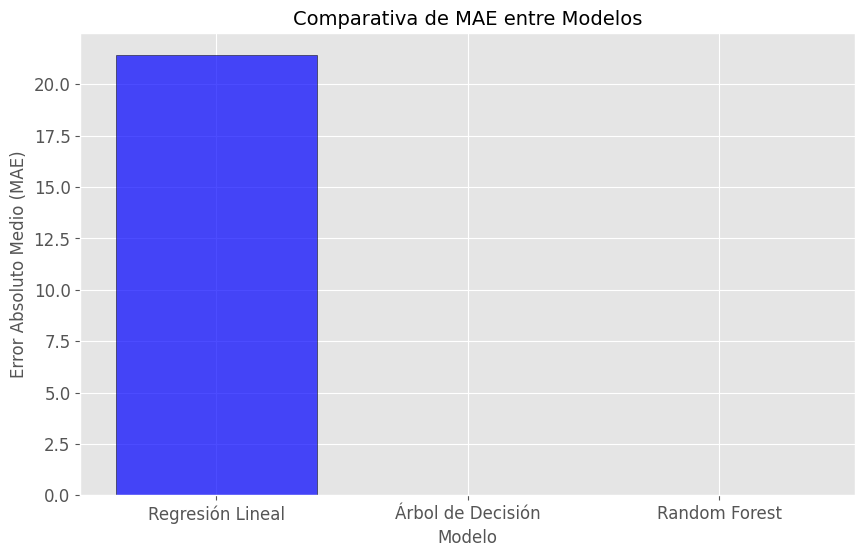

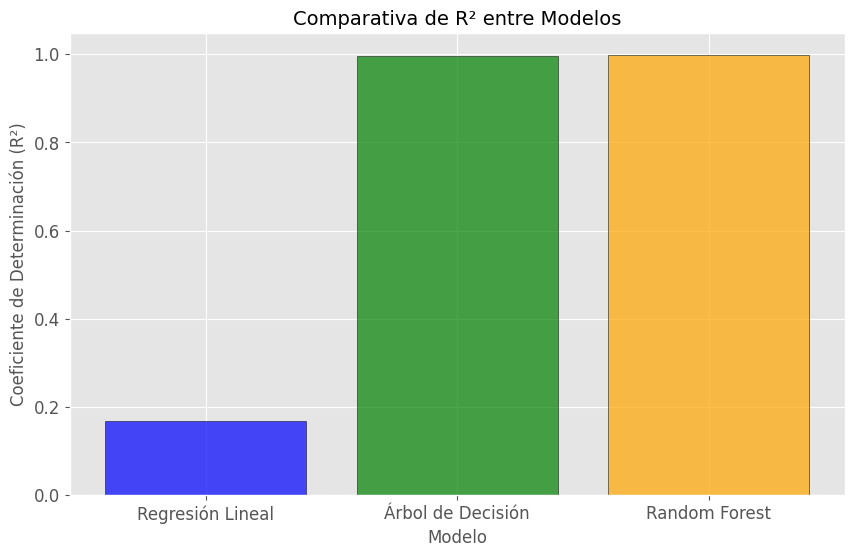

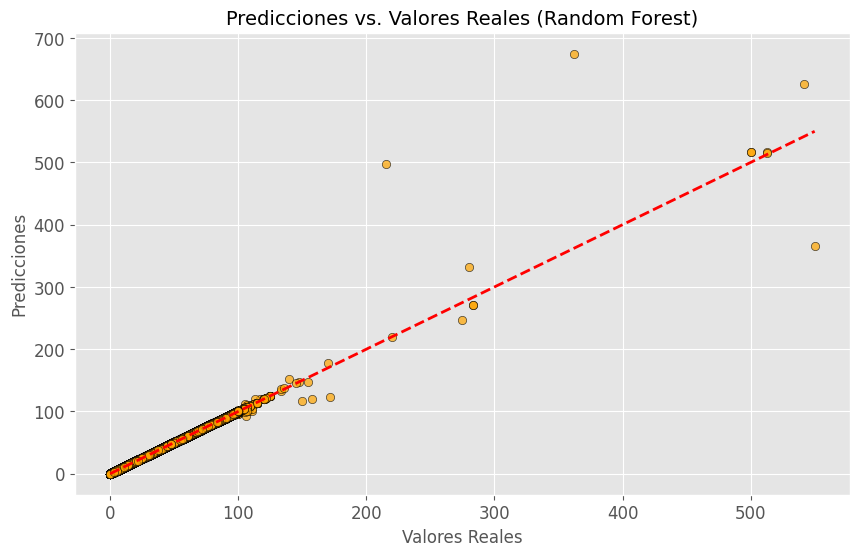

In [ ]:
# Visualización de Resultados

import matplotlib.pyplot as plt
import seaborn as sns

# Comparativa de MAE entre Modelos
plt.figure(figsize=(10, 6))
plt.bar(modelos, maes, color=["blue", "green", "orange"], alpha=0.7, edgecolor="black")
plt.title("Comparativa de MAE entre Modelos", fontsize=14)
plt.ylabel("Error Absoluto Medio (MAE)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.show()

# Comparativa de R² entre Modelos
plt.figure(figsize=(10, 6))
plt.bar(modelos, r2_scores, color=["blue", "green", "orange"], alpha=0.7, edgecolor="black")
plt.title("Comparativa de R² entre Modelos", fontsize=14)
plt.ylabel("Coeficiente de Determinación (R²)", fontsize=12)
plt.xlabel("Modelo", fontsize=12)
plt.show()

# Predicciones vs Valores Reales (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="orange", edgecolor="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Predicciones vs. Valores Reales (Random Forest)", fontsize=14)
plt.xlabel("Valores Reales", fontsize=12)
plt.ylabel("Predicciones", fontsize=12)
plt.show()


## **9. Creación de Tablas y Exportación de Datos**

En esta etapa, consolidamos los resultados clave en tablas y exportamos los datasets finales en formato CSV para su análisis o visualización en otras herramientas.

1. **Tablas resumen**: Creamos tablas con las métricas de desempeño de los modelos y las tendencias observadas en los datos.
2. **Exportación de datasets**:
   - Exportamos el dataset histórico filtrado y enriquecido para análisis adicionales.
   - Exportamos los resultados de predicción generados por los modelos.

Estos archivos son útiles para alimentar herramientas como Google Data Studio, Power BI o Tableau, permitiendo realizar reportes dinámicos y visualizaciones avanzadas.


In [ ]:
# Exportación de datos

# 1. Exportar el dataset histórico filtrado
ruta_historico = "dataset_historico_filtrado.csv"
embalses.to_csv(ruta_historico, index=False)
print(f"Dataset histórico filtrado exportado como: {ruta_historico}")

# 2. Exportar el dataset geográfico enriquecido
ruta_geografico = "dataset_geografico_enriquecido.csv"
embalses_geo.to_csv(ruta_geografico, index=False)
print(f"Dataset geográfico enriquecido exportado como: {ruta_geografico}")

# 3. Exportar los resultados de predicción
# Creamos un DataFrame con los valores reales y las predicciones de cada modelo
resultados_prediccion = pd.DataFrame({
    "Valores Reales": y_test,
    "Predicción Regresión Lineal": y_pred_lr,
    "Predicción Árbol de Decisión": y_pred_dt,
    "Predicción Random Forest": y_pred_rf
})
ruta_predicciones = "resultados_prediccion_modelos.csv"
resultados_prediccion.to_csv(ruta_predicciones, index=False)
print(f"Resultados de predicción exportados como: {ruta_predicciones}")


Dataset histórico filtrado exportado como: dataset_historico_filtrado.csv
Dataset geográfico enriquecido exportado como: dataset_geografico_enriquecido.csv
Resultados de predicción exportados como: resultados_prediccion_modelos.csv


## **10. Desarrollo de un Prototipo Interactivo**

En este paso, crearemos un prototipo interactivo que permita explorar y analizar los datos procesados. Este prototipo es útil para comprender las tendencias, realizar consultas específicas y facilitar el análisis dinámico de los datos.

El prototipo se implementará utilizando bibliotecas interactivas como **Plotly** o **IPyWidgets**, que nos permiten visualizar datos y modelos de manera dinámica.

### **Objetivos del prototipo interactivo**:
1. Visualizar las predicciones de los modelos.
2. Explorar las tendencias históricas y geográficas de los datos de embalses.
3. Generar gráficos y tablas personalizables según las necesidades del análisis.

In [ ]:
# Importar librerías necesarias
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets

# Simular datos para probar interactividad
data = {
    "año": [2020, 2020, 2021, 2021, 2022],
    "mes": [1, 2, 1, 2, 1],
    "porcentaje_actual": [50, 60, 70, 80, 90],
    "Valores Reales": [50, 60, 70, 80, 90],
    "Predicción (Regresión Lineal)": [55, 58, 73, 78, 92],
    "Predicción (Árbol de Decisión)": [52, 62, 68, 85, 88],
    "Predicción (Random Forest)": [53, 59, 72, 79, 91]
}
embalses = pd.DataFrame(data)

# Función para explorar y graficar
def explorar_datos(filtro_año, filtro_mes, modelo):
    # Filtrar datos por año y mes
    datos_filtrados = embalses[(embalses["año"] == filtro_año) & (embalses["mes"] == filtro_mes)]

    if datos_filtrados.empty:
        print(f"No hay datos disponibles para el año {filtro_año} y mes {filtro_mes}.")
        return

    # Histograma de porcentaje actual
    fig_hist = px.histogram(
        datos_filtrados,
        x="porcentaje_actual",
        nbins=10,
        title=f"Distribución del Porcentaje de Llenado ({filtro_año}-{filtro_mes})",
        labels={"porcentaje_actual": "Porcentaje de Llenado"},
        color_discrete_sequence=["blue"]
    )
    fig_hist.show()

    # Gráfico de predicciones vs valores reales
    resultados = datos_filtrados[["Valores Reales", f"Predicción ({modelo})"]]
    fig_pred = px.scatter(
        resultados,
        x="Valores Reales",
        y=f"Predicción ({modelo})",
        title=f"Predicciones vs. Valores Reales ({modelo})",
        labels={"Valores Reales": "Valores Reales", f"Predicción ({modelo})": "Predicciones"},
        color_discrete_sequence=["orange"]
    )
    # Añadir línea perfecta
    max_val = max(resultados["Valores Reales"].max(), resultados[f"Predicción ({modelo})"].max())
    fig_pred.add_scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode="lines",
        name="Línea Perfecta",
        line=dict(color="red", dash="dash")
    )
    fig_pred.show()

# Crear widgets de interacción
años_disponibles = embalses["año"].unique()
año_selector = widgets.IntSlider(min=min(años_disponibles), max=max(años_disponibles), step=1, value=2020, description="Año:")
mes_selector = widgets.IntSlider(min=1, max=12, step=1, value=1, description="Mes:")
modelo_selector = widgets.Dropdown(
    options=["Regresión Lineal", "Árbol de Decisión", "Random Forest"],
    value="Regresión Lineal",
    description="Modelo:"
)

# Interacción con widgets
interact(explorar_datos, filtro_año=año_selector, filtro_mes=mes_selector, modelo=modelo_selector)


interactive(children=(IntSlider(value=2020, description='Año:', max=2022, min=2020), IntSlider(value=1, descri…

<function __main__.explorar_datos(filtro_año, filtro_mes, modelo)>

In [ ]:
# Filtramos el dataset para quedarnos con los valores históricos del 2012 al 2022
tabla_lin = embalses[(embalses["fecha"]>"01/01/2012") & (embalses["fecha"]<"01/01/2022")]
tabla_lin.head()

,demarcacion_hidrografica,EMBALSE_NOMBRE,fecha,capacidad_total,volumen_actual,porcentaje_actual,año,mes
1252,Miño - Sil,Albarellos,2012-01-03,91.0,29.0,31.868132,2012,1
1253,Miño - Sil,Albarellos,2012-01-10,91.0,30.0,32.967033,2012,1
1254,Miño - Sil,Albarellos,2012-01-17,91.0,26.0,28.571429,2012,1
1255,Miño - Sil,Albarellos,2012-01-24,91.0,29.0,31.868132,2012,1
1256,Miño - Sil,Albarellos,2012-01-31,91.0,32.0,35.164835,2012,1


Visualizamos las 5 primeras filas de la tabla y comprobamos que se ha **filtrado** correctamente.

## 00000. Creación de tabla para visualización "Reserva hídrica (hm3) entre los años 2012 y 2022"

Generamos **una nueva tabla de datos** preparada para alimentar la herramienta de visualización que vamos a utilizar, Google Data Studio.

Para ello partimos del **dataset filtrado** en el apartado anterior. **Agrupamos** las variables por embalse, **calculamos la media** de los registros del volumen de agua y **renombramos** la nueva variable.


*   Para agrupar las varibles utilizamos la función [.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   Para renombrar las variables utilizamos las funciones [.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)







In [ ]:
# Agrupamos el dataset por nombre del embalse y generamos una columna con la media del volumen
tabla_vol = round(tabla_lin.groupby(["demarcacion_hidrografica", "embalse_nombre"])["volumen_actual"].mean().reset_index(),2)

# Renombramos la nueva columna generada
tabla_vol = tabla_vol.rename(columns= {"volumen_actual": "volumen_medio_10"})
tabla_vol.head()


KeyError: 'embalse_nombre'

Una vez generada la tabla **"tabla_vol"** la visualizamos para comprobar que los datos son correctos. En este caso se comprueba que se ha calculado el valor medio de volumen de agua por embalse y ha sido almacenada en una nueva variable "**"volumen_medio_10"**


## 8. Creación de tabla para visualización "Reserva hídrica (%) entre los años 2012 y 2022"

Generamos una **nueva tabla de datos** preparada para alimentar la herramienta de visualización que vamos a utilizar, Google Data Studio.

Para ello partimos del **dataset filtrado** en el apartado anterior. **Agrupamos** las variables por embalse, **calculamos la media** de los registros del porcentaje de llenado y **renombramos** la nueva variable.


*   Para agrupar las varibles utilizamos la función [.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   Para renombrar las variables utilizamos las funciones [.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)



In [ ]:
# Agrupamos el dataset por nombre del embalse y generamos una columna con la media del porcentaje
tabla_por = round(tabla_lin.groupby(["demarcacion_hidrografica", "embalse_nombre"])["porcentaje_actual"].mean().reset_index(),2)

# Renombramos la nueva columna generada
tabla_por = tabla_por.rename(columns= {"porcentaje_actual": "porcentaje_medio_10"})
tabla_por.head()

Una vez generada la tabla **"tabla_por"** la visualizamos para comprobar que los datos son correctos. En este caso se comprueba que ha sido calculado el valor medio de porcentaje de llenado por embalse y ha sido almacenado en una nueva variable "**"porcentaje_medio_10"**

## 9. Creación de tabla para visualización "Evolución mensual de la reserva hídrica (hm3)"

Generamos una **nueva tabla de datos** preparada para alimentar la herramienta de visualización que vamos a utilizar, **Google Data Studio**.

Esta tabla contiene los datos medios de volumen de agua embalsada por mes para distintas series temporales. Esta series temporales corresponden a los años **2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020 y 2021**.

Para ello partimos del **dataset filtrado en el apartado 5** con los datos pertenecientes al periodo temporal entre el 01/01/2012 y el 01/01/2022. Una vez filtrado, **agrupamos** las variables por embalse y mes, **calculamos la media** de los registros del volumen de agua y **renombramos** la nueva variable.


*   Para agrupar las varibles utilizamos la función [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   Para renombrar las variables utilizamos la funciones [.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

*   Para unir las tablas en utilizamos la función [.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [ ]:
# Creamos una lista con las fechas iniciales y finales de las series temporales
lista = ["01/01/2012", "01/01/2013", "01/01/2014", "01/01/2015", "01/01/2016", "01/01/2017", "01/01/2018", "01/01/2019", "01/01/2020", "01/01/2021", "01/01/2022"]

# Creamos un bucle que recorra la lista anterior
for i in range(len(lista)-1):
    # Filtramos el dataset con los datos correspondientes a cada una de las series temporales
    tabla_mini = tabla_lin[(embalses["fecha"] > lista[i]) & (embalses["fecha"]<lista[i+1])]
    # Agrupamos el dataset por demarcación hidrográfica, nombre del embalse y mes. Generamos una columna con la media del volumen
    lin = tabla_mini.groupby(["demarcacion_hidrografica","embalse_nombre", "mes"])["volumen_actual"].mean().reset_index()
    # Renombramos la nueva columna generada con el valor medio
    lin = lin.rename(columns= {"volumen_actual": lista[i].split("/")[2]})

    # Unificamos los datos de las distintas series temporales en una misma tabla
    if i == 0:
      tabla_lin_mes = lin
    else:
      tabla_lin_mes = tabla_lin_mes.merge(lin, on=["demarcacion_hidrografica","embalse_nombre","mes"], how = "inner")

tabla_lin_mes.head()

Una vez generada la tabla **"tabla_lin_mes"** la visualizamos para comprobar que los datos son correctos. En este caso se comprueba que los datos del "volumen_actual" han sido agrupados por **mes** y en las **distintas series temporales** previamente especificadas.

## 10. Guardado de las tablas para la generación de la visualización.

Una vez que tenemos las tablas con la estructura y variables que nos interesan para realizar la visualización de los datos, lo guardaremos como archivo de datos en formato **CSV** para posteriormente realizar otros análisis estadísticos o utilizarlo en otras herramientas de visualización de datos como la que abordamos a continuación. Es importante guardarlo con una codificación **UTF-8** (Formato de Transformación Unicode) para que los caracteres especiales sean identificados de manera correcta por cualquier software.

*   Para guardar las tablas como archivos CSV utilizamos la función [.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)




In [ ]:
# Guardamos las tablas como archivos csv.
tabla_lin.to_csv("lineas.csv", index = False, encoding = "utf-8")
tabla_vol.to_csv("volumen.csv", index = False, encoding = "utf-8")
tabla_por.to_csv("porcentaje.csv", index = False, encoding = "utf-8")
tabla_lin_mes.to_csv("lineas_mensual.csv", index = False, encoding = "utf-8")
embalses_geo.to_csv("geo.csv", index = False, encoding = "utf-8")





Una vez generados los archivos, en el menú desplegable de la izquierda de esta pantalla, en la sección "Archivos" (el icono de la carpeta), encontraremos los archivos que acabamos de guardar dentro de la carpeta "sample_data". Usando el menú contextual, los ficheros pueden ser descargados.

No obstante, dispones de estos conjuntos de datos preprocesados en esta carpeta del Laboratorio de datos del GitHub de datos.gob.es.

A contintuación, puedes seguir los siguientes pasos para visualizar los datos que acabamos de preprocesar utilizando la herramienta Google Data Studio en el post *(añadir nombre y enlace al post)*